<a href="https://colab.research.google.com/github/AbhishekChaganti/Deep-Learning/blob/main/EXP_3(news%20wires%20using%20reuters%20dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
len(x_train),len(x_test)

def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.4482 - loss: 2.4536 - val_accuracy: 0.6679 - val_loss: 1.3745
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7105 - loss: 1.2732 - val_accuracy: 0.7293 - val_loss: 1.1473
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7709 - loss: 0.9862 - val_accuracy: 0.7614 - val_loss: 1.0386
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8146 - loss: 0.7897 - val_accuracy: 0.7818 - val_loss: 0.9643
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.8507 - loss: 0.6377 - val_accuracy: 0.7827 - val_loss: 0.9637
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.8716 - loss: 0.5296 - val_accuracy: 0.7974 - val_loss: 0.9366
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.8999 - loss: 0.4186 - val_accuracy: 0.8072 - val_loss: 0.9197
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9089 - loss: 0.3748 - val_accuracy: 0.8063 

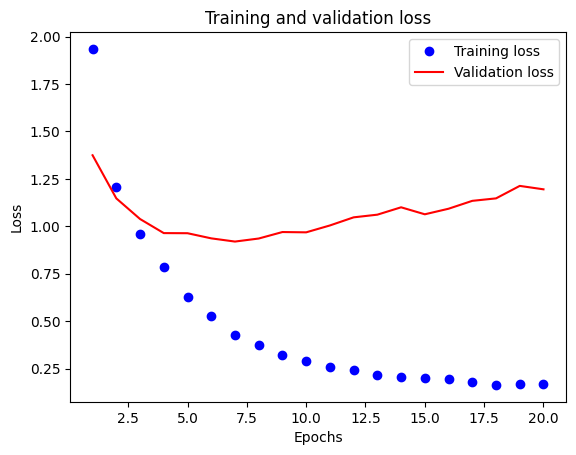

In [45]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

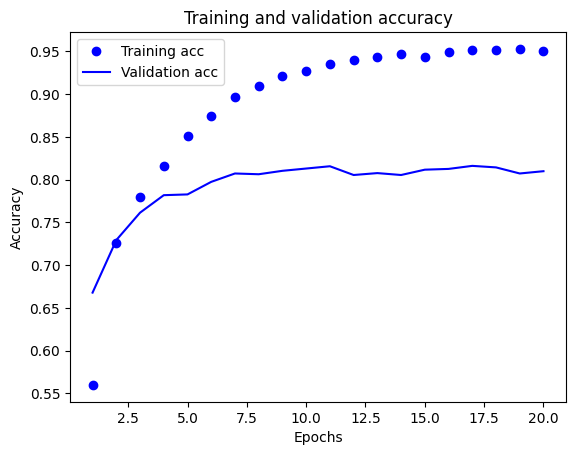

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Confusion Matrix:
 [[ 8  2  0 ...  0  0  0]
 [ 0 80  1 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.76      0.76      0.76       105
           2       0.77      0.85      0.81        20
           3       0.90      0.95      0.92       813
           4       0.86      0.85      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       0.50      0.33      0.40         3
           8       0.69      0.71      0.70        38
           9       0.86      0.76      0.81        25
          10       0.93      0.87      0.90        30
          11       0.62      0.78      0.70        83
          12       0.50      0.23      0.32        13
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
